# DKASC_Alice多模型训练0702

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
import keras
import catboost as cb
from pandas import read_csv
from math import sqrt
from numpy import concatenate
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import svm
from keras.layers.core import Dense, Activation, Dropout
from sklearn.externals import joblib
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:472: FutureWarning: Passi

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
config = tf.ConfigProto(allow_soft_placement = True)
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.5)
config.gpu_options.allow_growth = True
sess0 = tf.InteractiveSession(config = config)

In [3]:
print(os.getcwd()) # 打印当前工作目录

E:\Research Project\DKASC, Alice Springs


In [4]:
os.listdir(os.getcwd())

['.idea',
 '.ipynb_checkpoints',
 '101-Site_DKA-WeatherStation',
 '96-Site_DKA-MasterMeter1',
 'Alice_Springs_2016-2020',
 'Dataset',
 'logs',
 'picture',
 'Predict',
 'Program backups',
 'temp',
 'venv',
 '数据集_小波包分解重构数据.ipynb',
 '数据集_预处理_第二版0702.ipynb',
 '测试小波分解.ipynb',
 '测试模型0622.ipynb',
 '画图.ipynb',
 '笔记.ipynb',
 '训练模型0622.ipynb',
 '训练模型0702.ipynb',
 '训练模型0703 WPD.ipynb']

In [5]:
os.chdir("./Dataset")

In [6]:
os.listdir()

['DKA.Station_1-9.csv',
 'NaN_DKA.Station.csv',
 'raw_DKA.Station_1-9.csv',
 'test',
 'test0702',
 'testdata.csv',
 'testWPD',
 'test_1A.csv',
 'train',
 'train0702',
 'traindata.csv',
 'trainWPD',
 'train_1A.csv',
 '测试集8个站点.csv',
 '训练集8个站点.csv']

In [7]:
train = pd.read_csv('./train0702/train_Station_4.csv')
test = pd.read_csv('./test0702/test_Station_4.csv')

In [8]:
#查看输入数据维度
print(train.shape)
print(test.shape)

(314843, 13)
(102888, 13)


In [9]:
train.head(5)

,Timestamp,Year,Month,Day,Hour,Minutes,Temperature(°C),Relative Humidity(%),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),Station_4
0,2016/1/1 0:00,2016,1,1,0,0,17.176111,87.095665,186.941284,0.0,2.672255,1.103375,0.000400
1,2016/1/1 0:05,2016,1,1,0,5,17.133446,87.671669,191.876770,0.0,2.703700,1.152340,0.000400
2,2016/1/1 0:10,2016,1,1,0,10,17.084999,88.563240,188.268082,0.0,3.013785,1.566642,0.000533
3,2016/1/1 0:15,2016,1,1,0,15,16.955778,90.001663,197.727295,0.0,3.421924,1.707677,0.000067
4,2016/1/1 0:20,2016,1,1,0,20,16.854271,91.222733,193.704559,0.0,3.292158,1.746989,0.000600


In [10]:
test.head(5)

,Timestamp,Year,Month,Day,Hour,Minutes,Temperature(°C),Relative Humidity(%),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),Station_4
0,2019/1/1 0:00,2019,1,1,0,0,30.020723,20.125513,32.213470,0.0,1.543787,1.349848,0.000533
1,2019/1/1 0:05,2019,1,1,0,5,29.958653,20.040049,32.158791,0.0,1.373370,1.244123,0.000433
2,2019/1/1 0:10,2019,1,1,0,10,29.884491,20.013313,32.155808,0.0,1.142953,0.992849,0.000867
3,2019/1/1 0:15,2019,1,1,0,15,29.831554,20.068233,32.178555,0.0,0.709036,0.611533,0.000767
4,2019/1/1 0:20,2019,1,1,0,20,29.750330,20.086567,32.166214,0.0,1.058623,0.814599,0.000533


# 数据预处理训练集去异常值

In [11]:
#使用df.isnull().sum()来获得与行数None和NaN值。
train.isnull().sum()

Timestamp                             0
Year                                  0
Month                                 0
Day                                   0
Hour                                  0
Minutes                               0
Temperature(°C)                       0
Relative Humidity(%)                  0
Wind Direction(Degrees)               0
Daily Rainfall(mm)                    0
Global Horizontal Radiation(W/m²)     0
Diffuse Horizontal Radiation(W/m²)    0
Station_4                             0
dtype: int64

In [12]:
test.isnull().sum()

Timestamp                             0
Year                                  0
Month                                 0
Day                                   0
Hour                                  0
Minutes                               0
Temperature(°C)                       0
Relative Humidity(%)                  0
Wind Direction(Degrees)               0
Daily Rainfall(mm)                    0
Global Horizontal Radiation(W/m²)     0
Diffuse Horizontal Radiation(W/m²)    0
Station_4                             0
dtype: int64

In [13]:
train.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'Temperature(°C)', 'Relative Humidity(%)', 'Wind Direction(Degrees)',
       'Daily Rainfall(mm)', 'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Station_4'],
      dtype='object')

In [14]:
test.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'Temperature(°C)', 'Relative Humidity(%)', 'Wind Direction(Degrees)',
       'Daily Rainfall(mm)', 'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Station_4'],
      dtype='object')

In [15]:
train.head()

,Timestamp,Year,Month,Day,Hour,Minutes,Temperature(°C),Relative Humidity(%),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),Station_4
0,2016/1/1 0:00,2016,1,1,0,0,17.176111,87.095665,186.941284,0.0,2.672255,1.103375,0.000400
1,2016/1/1 0:05,2016,1,1,0,5,17.133446,87.671669,191.876770,0.0,2.703700,1.152340,0.000400
2,2016/1/1 0:10,2016,1,1,0,10,17.084999,88.563240,188.268082,0.0,3.013785,1.566642,0.000533
3,2016/1/1 0:15,2016,1,1,0,15,16.955778,90.001663,197.727295,0.0,3.421924,1.707677,0.000067
4,2016/1/1 0:20,2016,1,1,0,20,16.854271,91.222733,193.704559,0.0,3.292158,1.746989,0.000600


In [16]:
test.head()

,Timestamp,Year,Month,Day,Hour,Minutes,Temperature(°C),Relative Humidity(%),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),Station_4
0,2019/1/1 0:00,2019,1,1,0,0,30.020723,20.125513,32.213470,0.0,1.543787,1.349848,0.000533
1,2019/1/1 0:05,2019,1,1,0,5,29.958653,20.040049,32.158791,0.0,1.373370,1.244123,0.000433
2,2019/1/1 0:10,2019,1,1,0,10,29.884491,20.013313,32.155808,0.0,1.142953,0.992849,0.000867
3,2019/1/1 0:15,2019,1,1,0,15,29.831554,20.068233,32.178555,0.0,0.709036,0.611533,0.000767
4,2019/1/1 0:20,2019,1,1,0,20,29.750330,20.086567,32.166214,0.0,1.058623,0.814599,0.000533


# keras模型训练

准备数据

In [17]:
train.corr()

,Year,Month,Day,Hour,Minutes,Temperature(°C),Relative Humidity(%),Wind Direction(Degrees),Daily Rainfall(mm),Global Horizontal Radiation(W/m²),Diffuse Horizontal Radiation(W/m²),Station_4
Year,1.000000,0.000997,-0.001594,0.000271,-0.000018,0.039692,-0.142624,-0.306422,-0.014905,0.033324,-0.042472,0.007422
Month,0.000997,1.000000,0.010155,0.000246,-0.000024,-0.078508,-0.067525,-0.043320,0.024418,0.008511,0.019462,-0.009435
Day,-0.001594,0.010155,1.000000,0.000266,-0.000006,0.037173,-0.019835,-0.017119,0.027726,-0.006611,-0.000819,-0.002849
Hour,0.000271,0.000246,0.000266,1.000000,-0.000017,0.272605,-0.297760,-0.040612,0.075225,0.063334,0.070256,0.070728
Minutes,-0.000018,-0.000024,-0.000006,-0.000017,1.000000,0.000059,-0.000112,-0.000660,0.003149,0.000814,-0.001205,0.000270
Temperature(°C),0.039692,-0.078508,0.037173,0.272605,0.000059,1.000000,-0.473446,0.159687,0.025735,0.499530,0.405993,0.419459
Relative Humidity(%),-0.142624,-0.067525,-0.019835,-0.297760,-0.000112,-0.473446,1.000000,0.087882,0.217534,-0.409781,-0.178606,-0.405080
Wind Direction(Degrees),-0.306422,-0.043320,-0.017119,-0.040612,-0.000660,0.159687,0.087882,1.000000,0.053352,0.002940,0.043017,-0.035399
Daily Rainfall(mm),-0.014905,0.024418,0.027726,0.075225,0.003149,0.025735,0.217534,0.053352,1.000000,-0.032898,0.077250,-0.034166
Global Horizontal Radiation(W/m²),0.033324,0.008511,-0.006611,0.063334,0.000814,0.499530,-0.409781,0.002940,-0.032898,1.000000,0.561071,0.966004


In [18]:
train.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'Temperature(°C)', 'Relative Humidity(%)', 'Wind Direction(Degrees)',
       'Daily Rainfall(mm)', 'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Station_4'],
      dtype='object')

In [19]:
# #去除 WD，WDR 特征
# train1=train[['Temperature(°C)', 'Relative Humidity(%)', 'Wind Direction(Degrees)',
#        'Daily Rainfall(mm)', 'Global Horizontal Radiation(W/m²)',
#        'Diffuse Horizontal Radiation(W/m²)', 'Station_4']]
# print("查看训练集\n",train1.head())
# test1=test[['Temperature(°C)', 'Relative Humidity(%)', 'Wind Direction(Degrees)',
#        'Daily Rainfall(mm)', 'Global Horizontal Radiation(W/m²)',
#        'Diffuse Horizontal Radiation(W/m²)', 'Station_4']]
# print("查看测试集\n",test.head())

In [20]:
train1=train.drop(columns=['Timestamp','Year'])
test1= test.drop(columns=['Timestamp','Year'])

# 构建序列

In [21]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
#     n_vars = 1 if type(data) is list else data.shape[1]
    n_vars = list(data)
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('%s(t-%d)' % (j, i)) for j in n_vars]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('%s(t)' % (j) )for j in n_vars]
        else:
            names += [('%s(t+%d)' % (j, i)) for j in n_vars]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [1]:
train1 = series_to_supervised(train1,12,1)
test1 = series_to_supervised(test1,12,1)

NameError: name 'series_to_supervised' is not defined

In [23]:
# Timestamp = 

In [24]:
train1.columns

Index(['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)',
       'Temperature(°C)(t-12)', 'Relative Humidity(%)(t-12)',
       'Wind Direction(Degrees)(t-12)', 'Daily Rainfall(mm)(t-12)',
       'Global Horizontal Radiation(W/m²)(t-12)',
       'Diffuse Horizontal Radiation(W/m²)(t-12)',
       ...
       'Day(t)', 'Hour(t)', 'Minutes(t)', 'Temperature(°C)(t)',
       'Relative Humidity(%)(t)', 'Wind Direction(Degrees)(t)',
       'Daily Rainfall(mm)(t)', 'Global Horizontal Radiation(W/m²)(t)',
       'Diffuse Horizontal Radiation(W/m²)(t)', 'Station_4(t)'],
      dtype='object', length=143)

In [25]:
test1.columns

Index(['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)',
       'Temperature(°C)(t-12)', 'Relative Humidity(%)(t-12)',
       'Wind Direction(Degrees)(t-12)', 'Daily Rainfall(mm)(t-12)',
       'Global Horizontal Radiation(W/m²)(t-12)',
       'Diffuse Horizontal Radiation(W/m²)(t-12)',
       ...
       'Day(t)', 'Hour(t)', 'Minutes(t)', 'Temperature(°C)(t)',
       'Relative Humidity(%)(t)', 'Wind Direction(Degrees)(t)',
       'Daily Rainfall(mm)(t)', 'Global Horizontal Radiation(W/m²)(t)',
       'Diffuse Horizontal Radiation(W/m²)(t)', 'Station_4(t)'],
      dtype='object', length=143)

In [26]:
train1.shape

(314831, 143)

In [27]:
train1.drop(train1.columns[11:142],axis=1,inplace=True)
test1.drop(test1.columns[11:142],axis=1,inplace=True)

In [28]:
train1.columns

Index(['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)',
       'Temperature(°C)(t-12)', 'Relative Humidity(%)(t-12)',
       'Wind Direction(Degrees)(t-12)', 'Daily Rainfall(mm)(t-12)',
       'Global Horizontal Radiation(W/m²)(t-12)',
       'Diffuse Horizontal Radiation(W/m²)(t-12)', 'Station_4(t-12)',
       'Station_4(t)'],
      dtype='object')

# 归一化数据

In [29]:
train1 = train1.values
train1 = train1.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
train1 = scaler.fit_transform(train1)

test1 = test1.values
test1 = test1.astype('float32')     # 将整型变为float
scaler = MinMaxScaler(feature_range=(0, 1)) # 数据处理，归一化至0~1之间
test1 = scaler.fit_transform(test1)

inds = np.arange(train1.shape[0])
train1_inds = inds[0:int(train1.shape[0]*0.8)]
eval1_inds = inds[int(train1.shape[0]*0.8):train1.shape[0]]


train_X, train_y = train1[train1_inds,:-1], train1[train1_inds,-1:]
eval_X,eval_y = train1[eval1_inds,:-1], train1[eval1_inds,-1:]
test_X, test_y = test1[:, :-1], test1[:,-1:]

# reshape input to be 3D [samples, timesteps, features]
train_Xl = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
eval_Xl = eval_X.reshape((eval_X.shape[0],1,eval_X.shape[1]))
test_Xl = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape,eval_X.shape,eval_y.shape, test_X.shape, test_y.shape)
print(train_Xl.shape, train_y.shape,eval_Xl.shape,eval_y.shape, test_Xl.shape, test_y.shape)

(251864, 11) (251864, 1) (62967, 11) (62967, 1) (102876, 11) (102876, 1)
(251864, 1, 11) (251864, 1) (62967, 1, 11) (62967, 1) (102876, 1, 11) (102876, 1)


In [30]:
test_y

array([[0.00435867],
       [0.00435867],
       [0.00438782],
       ...,
       [0.00443155],
       [0.00450444],
       [0.00450444]], dtype=float32)

In [31]:
print(train1)

[[0.         0.         0.         ... 0.00150637 0.00402196 0.00404842]
 [0.         0.         0.         ... 0.00157322 0.00402196 0.00398227]
 [0.         0.         0.         ... 0.00213884 0.00404842 0.00394258]
 ...
 [1.         1.0000001  0.95652175 ... 0.00177943 0.00402196 0.0040815 ]
 [1.         1.0000001  0.95652175 ... 0.00142781 0.00395582 0.00406165]
 [1.         1.0000001  0.95652175 ... 0.00135066 0.00402196 0.00402196]]


In [32]:
print(train_X)

[[0.         0.         0.         ... 0.00171983 0.00150637 0.00402196]
 [0.         0.         0.         ... 0.00174007 0.00157322 0.00402196]
 [0.         0.         0.         ... 0.00193964 0.00213884 0.00404842]
 ...
 [0.36363637 0.8666667  0.17391305 ... 0.0010019  0.00143183 0.00394258]
 [0.36363637 0.8666667  0.17391305 ... 0.0009821  0.00158448 0.00388966]
 [0.36363637 0.8666667  0.17391305 ... 0.00102188 0.0014125  0.00394258]]


In [33]:
print(train_y)

[[0.00404842]
 [0.00398227]
 [0.00394258]
 ...
 [0.00396904]
 [0.0039955 ]
 [0.00416749]]


In [34]:
print(train_X.shape,train_y.shape,test_X.shape,test_y.shape)

(251864, 11) (251864, 1) (102876, 11) (102876, 1)


# SVM model

In [35]:
# model=svm.SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.1, gamma='auto',
#   kernel='rbf', max_iter=-1, shrinking=True, tol=0.0001, verbose=False)
# model.fit(train_X, train_y)

In [36]:
# #模型保存
# modelsvm = model
# joblib.dump(modelsvm, "../logs/modelsvm.m")

In [37]:
# #模型读取
# clf = joblib.load("train_model.m")
# clf.predit([0,0]) #此处test_X为特征集

In [38]:
# testPredictSVM=modelsvm.predict(test_X)
# print(testPredictSVM.shape())
# testPredictSVM=testPredictSVM[:, np.newaxis]
# print(testPredictSVM.shape())

# BP model

In [39]:
model=Sequential() #初始化模型
model.add(Dense(64,input_shape = (train_X.shape[1],),activation='sigmoid',init='uniform')) #添加一个隐含层，注：只是第一个隐含层需指定input_dim
model.add(Dense(1,activation='sigmoid')) #添加输出层
model.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mae'])  # 编译，指定目标函数与优化方法
# model4.fit(train_X,train_y ) # 模型训练
history=model.fit(x = train_X,y = train_y, validation_data = (eval_X,eval_y), epochs=100, batch_size=1000)
model.evaluate(test_X,test_y) #模型测试

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(64, input_shape=(11,), activation="sigmoid", kernel_initializer="uniform")`
  


Train on 251864 samples, validate on 62967 samples
Epoch 1/100
251864/251864 [==============================] - 2s - loss: 0.1894 - mean_absolute_error: 0.1894 - val_loss: 0.1471 - val_mean_absolute_error: 0.1471
Epoch 2/100
251864/251864 [==============================] - 1s - loss: 0.1034 - mean_absolute_error: 0.1034 - val_loss: 0.0801 - val_mean_absolute_error: 0.0801
Epoch 3/100
251864/251864 [==============================] - 1s - loss: 0.0738 - mean_absolute_error: 0.0738 - val_loss: 0.0680 - val_mean_absolute_error: 0.0680
Epoch 4/100
251864/251864 [==============================] - 1s - loss: 0.0699 - mean_absolute_error: 0.0699 - val_loss: 0.0637 - val_mean_absolute_error: 0.0637
Epoch 5/100
251864/251864 [==============================] - 2s - loss: 0.0688 - mean_absolute_error: 0.0688 - val_loss: 0.0626 - val_mean_absolute_error: 0.0626
Epoch 6/100
251864/251864 [==============================] - 2s - loss: 0.0682 - mean_absolute_error: 0.0682 - val_loss: 0.0612 - val_mean_

251864/251864 [==============================] - 1s - loss: 0.0313 - mean_absolute_error: 0.0313 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 52/100
251864/251864 [==============================] - 1s - loss: 0.0312 - mean_absolute_error: 0.0312 - val_loss: 0.0246 - val_mean_absolute_error: 0.0246
Epoch 53/100
251864/251864 [==============================] - 1s - loss: 0.0311 - mean_absolute_error: 0.0311 - val_loss: 0.0235 - val_mean_absolute_error: 0.0235
Epoch 54/100
251864/251864 [==============================] - 1s - loss: 0.0311 - mean_absolute_error: 0.0311 - val_loss: 0.0237 - val_mean_absolute_error: 0.0237
Epoch 55/100
251864/251864 [==============================] - 1s - loss: 0.0311 - mean_absolute_error: 0.0311 - val_loss: 0.0242 - val_mean_absolute_error: 0.0242
Epoch 56/100
251864/251864 [==============================] - 1s - loss: 0.0310 - mean_absolute_error: 0.0310 - val_loss: 0.0241 - val_mean_absolute_error: 0.0241
Epoch 57/100
251864/251864 [=======

[0.026414444278617135, 0.026414444278617135]

In [40]:
#模型保存
modelbp = model
modelbp.save('../logs/BP0702.h5')  

In [41]:
# #模型加载
# modelbp = load_model('../logs/modelbp.h5') 

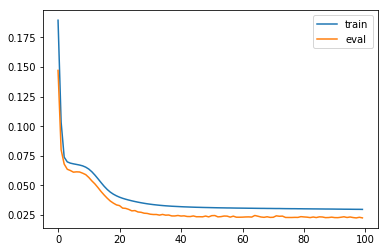

In [42]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='eval')
plt.legend()
plt.show()

# DNN model

In [173]:
model = Sequential()
model.add(Dense(units=64, input_shape = (train_X.shape[1],),activation='sigmoid',name='layer1',use_bias = False))
model.add(Dense(units=32,activation='sigmoid',name='layer2',use_bias = True))
model.add(Dense(units=16,name='layer3',activation='sigmoid',use_bias = True))
# model.add(Dense(units=8,name='layer4',activation='sigmoid',use_bias = True))
model.add(Dense(units=1,name='layer5',activation='sigmoid'))
model.compile(loss='mean_absolute_error',
              optimizer='rmsprop',
              metrics=['mae'])
history=model.fit(x = train_X,y = train_y, validation_data = (eval_X,eval_y), epochs=200, batch_size=1000)
############################################################################################################

Train on 251864 samples, validate on 62967 samples
Epoch 1/200
251864/251864 [==============================] - 3s - loss: 0.2040 - mean_absolute_error: 0.2040 - val_loss: 0.1931 - val_mean_absolute_error: 0.1931
Epoch 2/200
251864/251864 [==============================] - 2s - loss: 0.1436 - mean_absolute_error: 0.1436 - val_loss: 0.0715 - val_mean_absolute_error: 0.0715
Epoch 3/200
251864/251864 [==============================] - 2s - loss: 0.0659 - mean_absolute_error: 0.0659 - val_loss: 0.0554 - val_mean_absolute_error: 0.0554
Epoch 4/200
251864/251864 [==============================] - 2s - loss: 0.0601 - mean_absolute_error: 0.0601 - val_loss: 0.0513 - val_mean_absolute_error: 0.0513
Epoch 5/200
251864/251864 [==============================] - 2s - loss: 0.0592 - mean_absolute_error: 0.0592 - val_loss: 0.0510 - val_mean_absolute_error: 0.0510
Epoch 6/200
251864/251864 [==============================] - 2s - loss: 0.0584 - mean_absolute_error: 0.0584 - val_loss: 0.0497 - val_mean_

251864/251864 [==============================] - 2s - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0216 - val_mean_absolute_error: 0.0216
Epoch 101/200
251864/251864 [==============================] - 2s - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0191 - val_mean_absolute_error: 0.0191
Epoch 102/200
251864/251864 [==============================] - 2s - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0211 - val_mean_absolute_error: 0.0211
Epoch 103/200
251864/251864 [==============================] - 2s - loss: 0.0264 - mean_absolute_error: 0.0264 - val_loss: 0.0194 - val_mean_absolute_error: 0.0194
Epoch 104/200
251864/251864 [==============================] - 2s - loss: 0.0263 - mean_absolute_error: 0.0263 - val_loss: 0.0190 - val_mean_absolute_error: 0.0190
Epoch 105/200
251864/251864 [==============================] - 2s - loss: 0.0263 - mean_absolute_error: 0.0263 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196
Epoch 106/200
251864/251864 [=

251864/251864 [==============================] - 2s - loss: 0.0254 - mean_absolute_error: 0.0254 - val_loss: 0.0206 - val_mean_absolute_error: 0.0206
Epoch 151/200
251864/251864 [==============================] - 2s - loss: 0.0254 - mean_absolute_error: 0.0254 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196
Epoch 152/200
251864/251864 [==============================] - 2s - loss: 0.0254 - mean_absolute_error: 0.0254 - val_loss: 0.0188 - val_mean_absolute_error: 0.0188
Epoch 153/200
251864/251864 [==============================] - 2s - loss: 0.0254 - mean_absolute_error: 0.0254 - val_loss: 0.0186 - val_mean_absolute_error: 0.0186
Epoch 154/200
251864/251864 [==============================] - 2s - loss: 0.0254 - mean_absolute_error: 0.0254 - val_loss: 0.0188 - val_mean_absolute_error: 0.0188
Epoch 155/200
251864/251864 [==============================] - 2s - loss: 0.0254 - mean_absolute_error: 0.0254 - val_loss: 0.0208 - val_mean_absolute_error: 0.0208
Epoch 156/200
251864/251864 [=

251864/251864 [==============================] - 2s - loss: 0.0248 - mean_absolute_error: 0.0248 - val_loss: 0.0194 - val_mean_absolute_error: 0.0194


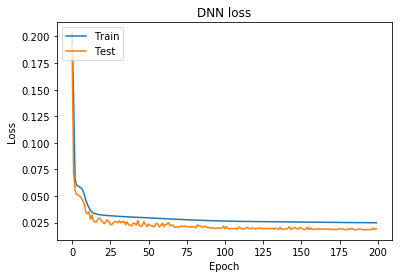

In [174]:
########################################################################
# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [175]:
#模型保存
modeldnn = model
modeldnn.save('../logs/DNN0702.h5')  


In [99]:
# #模型加载
# modeldnn = load_model('../logs/modeldnn.h5') 

# LSTM model

In [149]:
# design network
model = Sequential()
model.add(LSTM(64, input_shape=(train_Xl.shape[1], train_Xl.shape[2]),return_sequences=True))
model.add(LSTM(32,return_sequences=True,use_bias = True))
model.add(LSTM(16,return_sequences=False,use_bias = True))
model.add(Dense(1))

# model.add(LSTM(64, input_shape=(train_Xl.shape[1], train_Xl.shape[2]),return_sequences=True))
# model.add(LSTM(32,return_sequences=True))
# model.add(LSTM(16,return_sequences=False))
# model.add(Dense(units=1,activation='tanh'))

model.compile(loss='mae', optimizer='adam')
# fit network
# history = model.fit(train_Xl, train_y, epochs=5, batch_size = 64, validation_data=(eval_Xl, eval_y), verbose=2, shuffle=False)
history = model.fit(train_Xl, train_y, epochs=200, batch_size = 1000, validation_data=(eval_Xl, eval_y), verbose=2, shuffle=False)

Train on 251864 samples, validate on 62967 samples
Epoch 1/200
8s - loss: 0.1105 - val_loss: 0.0744
Epoch 2/200
6s - loss: 0.0685 - val_loss: 0.0687
Epoch 3/200
6s - loss: 0.0635 - val_loss: 0.0595
Epoch 4/200
6s - loss: 0.0571 - val_loss: 0.0462
Epoch 5/200
6s - loss: 0.0483 - val_loss: 0.0414
Epoch 6/200
6s - loss: 0.0434 - val_loss: 0.0345
Epoch 7/200
6s - loss: 0.0405 - val_loss: 0.0313
Epoch 8/200
7s - loss: 0.0380 - val_loss: 0.0312
Epoch 9/200
6s - loss: 0.0372 - val_loss: 0.0303
Epoch 10/200
6s - loss: 0.0357 - val_loss: 0.0289
Epoch 11/200
6s - loss: 0.0343 - val_loss: 0.0289
Epoch 12/200
6s - loss: 0.0339 - val_loss: 0.0280
Epoch 13/200
6s - loss: 0.0333 - val_loss: 0.0282
Epoch 14/200
6s - loss: 0.0334 - val_loss: 0.0284
Epoch 15/200
6s - loss: 0.0331 - val_loss: 0.0288
Epoch 16/200
6s - loss: 0.0327 - val_loss: 0.0267
Epoch 17/200
7s - loss: 0.0326 - val_loss: 0.0272
Epoch 18/200
7s - loss: 0.0325 - val_loss: 0.0260
Epoch 19/200
7s - loss: 0.0321 - val_loss: 0.0271
Epoch 20

6s - loss: 0.0248 - val_loss: 0.0184
Epoch 164/200
6s - loss: 0.0248 - val_loss: 0.0184
Epoch 165/200
7s - loss: 0.0248 - val_loss: 0.0186
Epoch 166/200
6s - loss: 0.0247 - val_loss: 0.0186
Epoch 167/200
6s - loss: 0.0247 - val_loss: 0.0186
Epoch 168/200
7s - loss: 0.0247 - val_loss: 0.0189
Epoch 169/200
6s - loss: 0.0247 - val_loss: 0.0189
Epoch 170/200
6s - loss: 0.0246 - val_loss: 0.0190
Epoch 171/200
6s - loss: 0.0246 - val_loss: 0.0191
Epoch 172/200
6s - loss: 0.0246 - val_loss: 0.0192
Epoch 173/200
6s - loss: 0.0247 - val_loss: 0.0191
Epoch 174/200
6s - loss: 0.0246 - val_loss: 0.0195
Epoch 175/200
6s - loss: 0.0246 - val_loss: 0.0196
Epoch 176/200
6s - loss: 0.0246 - val_loss: 0.0194
Epoch 177/200
6s - loss: 0.0247 - val_loss: 0.0195
Epoch 178/200
6s - loss: 0.0246 - val_loss: 0.0195
Epoch 179/200
6s - loss: 0.0246 - val_loss: 0.0195
Epoch 180/200
6s - loss: 0.0245 - val_loss: 0.0196
Epoch 181/200
6s - loss: 0.0245 - val_loss: 0.0198
Epoch 182/200
6s - loss: 0.0245 - val_loss: 0

In [150]:
#模型保存
modellstm = model
modellstm.save('../logs/LSTM0702.h5')  

In [151]:
# #模型加载
# modellstm = load_model('../logs/modellstm.h5') 

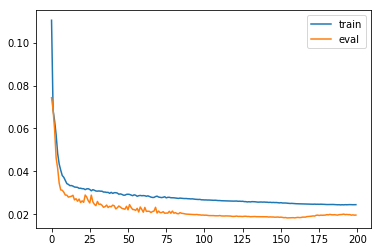

In [152]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='eval')
plt.legend()
plt.show()

In [153]:
# def inv2(testPredictML,test_X,test_y):
#     # invert scaling for forecast
#     inv_testPredictML = concatenate((test_X[:,:],testPredictML), axis=1)
#     inv_testPredictML = scaler.inverse_transform(inv_testPredictML)
#     testPredictML = inv_testPredictML[:,-1:]
#     # invert scaling for actual
#     test_y = test_y.reshape((len(test_y), 1))
#     inv_test = concatenate((test_X[:,:],test_y), axis=1)
#     inv_test = scaler.inverse_transform(inv_test)
#     testReal = inv_test[:,-1:]
#     return testPredictML,testReal

In [176]:
def inv(testPredictML,test_X,test_y):
    # invert scaling for forecast
    inv_testPredictML = concatenate((test_X[:,:],testPredictML), axis=1)
    inv_testPredictML = scaler.inverse_transform(inv_testPredictML)
    testPredictML = inv_testPredictML[:,-1:]
    # invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_test = concatenate((test_X[:,:],test_y), axis=1)
    inv_test = scaler.inverse_transform(inv_test)
    testReal = inv_test[:,-1:]
    return testPredictML,testReal,inv_test

In [177]:
# # make a prediction
# testPredictls1 = model1.predict(test_X)
# testPredictls2 = model2.predict(test_X)


In [178]:
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# testPredictls1,testReal = inv2(testPredictls1,test_X,test_y)
# testPredictls2,testReal = inv2(testPredictls2,test_X,test_y)

In [179]:
# # calculate RMSE
# rmse = sqrt(mean_squared_error(testReal, testPredictls1))
# print('Test RMSE: %.3f' % rmse)

In [180]:
# #真实值和预测值对比图
# plt.plot(testReal,label='Real')
# plt.plot(testPredictls1,label='ls1Predicition')
# plt.plot(testPredictls2,label='ls2Predicition')
# # plt.plot(testPredictM3,label='M3Predicition')

# plt.title('Prediction test')
# plt.ylabel('Power')
# plt.xlabel('Time')
# # plt.plot(y_rr_,label='rr')
# # plt.plot(y_lasso_,label='lasso')
# plt.legend() 

# 结果对比

In [181]:
#反归一化##
def inv00(pred,A_year,A_X,A_y):
    ######训练集#######
    inv_pred = concatenate((A_year[:,:],A_X[:,:],pred), axis=1)
    inv_pred = scaler.inverse_transform(inv_pred)
    pred = inv_pred[:,-1:]
    ###### 训练集真实值######
    A_y = A_y.reshape((len(A_y), 1))
    inv_A = concatenate((A_year[:,:],A_X[:,:],A_y), axis=1)
    inv_A = scaler.inverse_transform(inv_A)
    AReal = inv_A[:,-1:]
    return pred,AReal,inv_A   

In [182]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

# svm

In [183]:
# svm_pred = modelsvm.predict(test_X)
# svm_pred = svm_pred[:, np.newaxis]
# svm_pred,y_true,inv_test=inv(svm_pred,test_X,test_y)

In [184]:
# svm_mse = metrics.mean_squared_error(y_true, svm_pred)
# # svm_rmse = math.sqrt(mean_squared_error(y_true[:,0], svm_pred[:,0]))
# svm_rmse = math.sqrt(mean_squared_error(y_true, svm_pred))
# svm_mae = metrics.mean_absolute_error(y_true, svm_pred)
# svm_mape = mape(y_true, svm_pred)
# svm_smape = smape(y_true, svm_pred)

In [185]:
# print(svm_mse,svm_rmse,svm_mae,svm_mape,svm_smape)

# bp

In [186]:
bp_pred = modelbp.predict(test_X)
bp_pred,y_true,inv_test=inv(bp_pred,test_X,test_y)

bp_mse = metrics.mean_squared_error(y_true, bp_pred)
bp_rmse = math.sqrt(mean_squared_error(y_true[:,0], bp_pred[:,0]))
bp_mae = metrics.mean_absolute_error(y_true, bp_pred)
bp_mape = mape(y_true, bp_pred)
bp_smape = smape(y_true, bp_pred)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [187]:
print(bp_mse,bp_rmse,bp_mae,bp_mape,bp_smape)

0.07620603 0.27605439402671406 0.1208003 inf 113.29879760742188


# dnn

In [188]:
dnn_pred = modeldnn.predict(test_X)
# dnn_pred,y_true,inv_test=inv(dnn_pred,test_year,test_X,test_y)
dnn_pred,y_true,inv_test=inv(dnn_pred,test_X,test_y)

dnn_mse = metrics.mean_squared_error(y_true, dnn_pred)
dnn_rmse = math.sqrt(mean_squared_error(y_true[:,0], dnn_pred[:,0]))
dnn_mae = metrics.mean_absolute_error(y_true, dnn_pred)
dnn_mape = mape(y_true, dnn_pred)
dnn_smape = smape(y_true, dnn_pred)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [189]:
print(dnn_mse,dnn_rmse,dnn_mae,dnn_mape,dnn_smape)

0.061620045 0.24823385235158804 0.09658542 inf 111.5146279335022


# LSTM


In [190]:
# make a prediction
lstm_pred = modellstm.predict(test_Xl)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
lstm_pred,y_true,inv_test=inv(lstm_pred,test_X,test_y)
lstm_mse = metrics.mean_squared_error(y_true, lstm_pred)
lstm_rmse = math.sqrt(mean_squared_error(y_true[:,0], lstm_pred[:,0]))
lstm_mae = metrics.mean_absolute_error(y_true, lstm_pred)
lstm_mape = mape(y_true, lstm_pred)
lstm_smape = smape(y_true, lstm_pred)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [191]:
print(lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape)

0.059573565 0.24407696466162176 0.10383811 inf 110.37533283233643


# 评价指标

In [192]:
#评价指标
# evaluate = pd.DataFrame(columns=['Test','SVM','BP','DNN','LSTM'])
evaluate = pd.DataFrame(columns=['Test','BP','DNN','LSTM'])

In [193]:
evaluate['Test']=['MSE','RMSE','MAE','MAPE','SMAPE']
evaluate=evaluate.set_index('Test',drop=True)

In [194]:
# evaluate['SVM']=[svm_mse,svm_rmse,svm_mae,svm_mape ,svm_smape]
evaluate['BP']=[bp_mse,bp_rmse,bp_mae,bp_mape ,bp_smape]
evaluate['DNN']=[dnn_mse,dnn_rmse,dnn_mae,dnn_mape ,dnn_smape]
evaluate['LSTM']=[lstm_mse,lstm_rmse,lstm_mae,lstm_mape,lstm_smape]
evaluate

,BP,DNN,LSTM
Test,,,
MSE,0.076206,0.061620,0.059574
RMSE,0.276054,0.248234,0.244077
MAE,0.120800,0.096585,0.103838
MAPE,inf,inf,inf
SMAPE,113.298798,111.514628,110.375333


# 保存预测结果并绘图

In [ ]:
# # from pylab import *
# # mpl.rcParams['font.sans-serif'] = ['SimHei']
# #真实值和预测值对比图
# # plt.plot(y_true,'royalblue',label='Real')
# # plt.plot(svm_pred,'orange',label='SVM')
# plt.plot(y_true,'b',label='Real')
# plt.plot(svm_pred,'m',label='SVM')



# plt.title('Station 1')
# plt.ylabel('Power')
# plt.xlabel('Time')
# plt.legend()
# plt.savefig('../picture/SVM1.jpg')

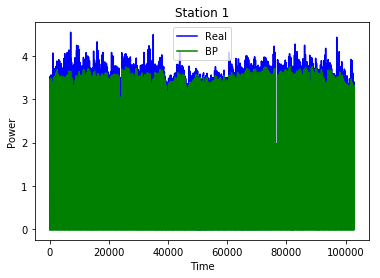

In [195]:
#真实值和预测值对比图
# plt.plot(y_true,'royalblue',label='Real')
# plt.plot(bp_pred,'limegreen',label='BP')
plt.plot(y_true,'b',label='Real')
plt.plot(bp_pred,'g',label='BP')


plt.title('Station 1')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()
plt.savefig('../picture/BP0702.jpg')

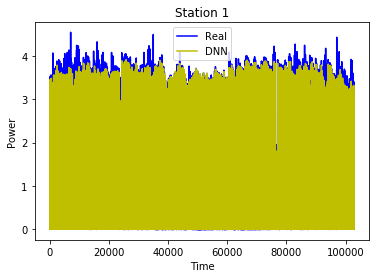

In [196]:
#真实值和预测值对比图
# plt.plot(y_true,'royalblue',label='Real')
# plt.plot(dnn_pred,'tomato',label='DNN')
plt.plot(y_true,'b',label='Real')
plt.plot(dnn_pred,'y',label='DNN')


plt.title('Station 1')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()
plt.savefig('../picture/DNN0702.jpg')

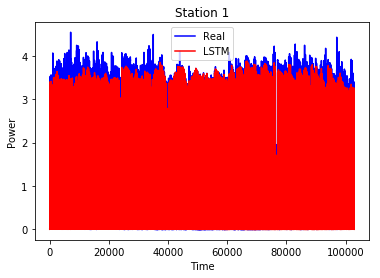

In [197]:
#真实值和预测值对比图

# plt.plot(lstm_pred,'orchid',label='LSTM')
plt.plot(y_true,'b',label='Real')
plt.plot(lstm_pred,'r',label='LSTM')

plt.title('Station 1')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()
plt.savefig('../picture/LSTM0702.jpg')

# 保存

In [201]:
# test1.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [204]:
test.columns

Index(['Timestamp', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'Temperature(°C)', 'Relative Humidity(%)', 'Wind Direction(Degrees)',
       'Daily Rainfall(mm)', 'Global Horizontal Radiation(W/m²)',
       'Diffuse Horizontal Radiation(W/m²)', 'Station_4'],
      dtype='object')

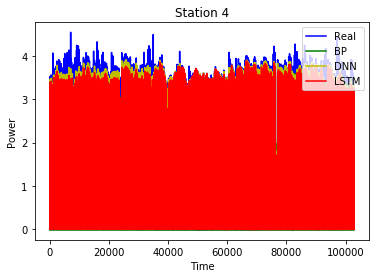

In [205]:

#真实值和预测值对比图
plt.plot(y_true,'b',label='Real')
# plt.plot(svm_pred,'m',label='SVM')
plt.plot(bp_pred,'g',label='BP')
plt.plot(dnn_pred,'y',label='DNN')
plt.plot(lstm_pred,'r',label='LSTM')

plt.title('Station 4')
plt.ylabel('Power')
plt.xlabel('Time')
plt.legend()
plt.savefig('../picture/SVMLSTM1.jpg')

#训练集和测试集 预测结果保存
predict_ = pd.DataFrame(inv_test)
# predict_.columns = ['Year', 'Month', 'Day', 'Hour', 'Minutes', 'WTC', 'WRH', 'GHR', 'DHR',
#        'RGT', 'RDT', '1A Trina_power']
predict_.columns = ['Month(t-12)', 'Day(t-12)', 'Hour(t-12)', 'Minutes(t-12)',
       'Temperature(°C)(t-12)', 'Relative Humidity(%)(t-12)',
       'Wind Direction(Degrees)(t-12)', 'Daily Rainfall(mm)(t-12)',
       'Global Horizontal Radiation(W/m²)(t-12)',
       'Diffuse Horizontal Radiation(W/m²)(t-12)', 'Station_4(t-12)',
       'Station_4(t)']
# predict_['SVM'] = svm_pred
predict_['BP'] = bp_pred
predict_['DNN'] = dnn_pred
predict_['LSTM'] = lstm_pred
predict_.to_csv('../predict/Station_4_predict.csv',index=False)


画出例如2020年1月20号的预测图

In [ ]:
predict_.columns

In [ ]:
# from scipy.interpolate import spline
predict_[['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)']] = predict_[['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)']].astype("int")

# Day0120 = predict_.loc[(predict_['Year'] == 2020) & (predict_['Month'] == ) & (predict_['Day'] == 20),:]
Day0120 = predict_.loc[(predict_['Month(t-1)'] == 2 ) & (predict_['Day(t-1)'] == 20),:]
#real_power_day.set_index('time', inplace=False)
Real=Day0120.set_index('Hour(t-1)', inplace=False)['1A Trina_power(t+1)']
svm_pr=Day0120.set_index('Hour(t-1)', inplace=False)['SVM']
bp_pr=Day0120.set_index('Hour(t-1)', inplace=False)['BP']
dnn_pr=Day0120.set_index('Hour(t-1)', inplace=False)['DNN']
lstm_pr=Day0120.set_index('Hour(t-1)', inplace=False)['LSTM']

fig = plt.figure()
plt.plot(Real,label='Real')
plt.plot(svm_pr,label='SVM')
plt.plot(bp_pr,label='BP')
plt.plot(dnn_pr,label='DNN')
plt.plot(lstm_pr,label='LSTM')

plt.title('Prediction 2020-2-20')
plt.ylabel('Power')
plt.xlabel('Time')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend()
plt.savefig('../picture/2-20pred.jpg')
#ax = fig.add_subplot(1,1,1)
#ax.plot(real_power_day_)
# real_power_day_.plot()
#real_power_day_.set_axis(['00:15:00','06:15:00','12:15:00','18:15:00'])
#real_power_day_

# 2020 

In [ ]:
# from scipy.interpolate import spline
predict_[['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)']] = predict_[['Month(t-1)', 'Day(t-1)', 'Hour(t-1)', 'Minutes(t-1)']].astype("int")

# Day0120 = predict_.loc[(predict_['Year'] == 2020) & (predict_['Month'] == ) & (predict_['Day'] == 20),:]
Day0120 = predict_.loc[(predict_['Month(t-1)'] == 3 ) & (predict_['Day(t-1)'] == 25),:]
#real_power_day.set_index('time', inplace=False)
Real=Day0120.set_index('Hour(t-1)', inplace=False)['1A Trina_power(t+1)']
svm_pr=Day0120.set_index('Hour(t-1)', inplace=False)['SVM']
bp_pr=Day0120.set_index('Hour(t-1)', inplace=False)['BP']
dnn_pr=Day0120.set_index('Hour(t-1)', inplace=False)['DNN']
lstm_pr=Day0120.set_index('Hour(t-1)', inplace=False)['LSTM']

fig = plt.figure()
plt.plot(Real,label='Real')
plt.plot(svm_pr,label='SVM')
plt.plot(bp_pr,label='BP')
plt.plot(dnn_pr,label='DNN')
plt.plot(lstm_pr,label='LSTM')

plt.title('Prediction 2020-3-25')
plt.ylabel('Power')
plt.xlabel('Time')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.legend()
plt.savefig('../picture/3-25pred.jpg')
#ax = fig.add_subplot(1,1,1)
#ax.plot(real_power_day_)
# real_power_day_.plot()
#real_power_day_.set_axis(['00:15:00','06:15:00','12:15:00','18:15:00'])
#real_power_day_